In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dset = pd.read_csv(r"C:\Users\user\Downloads\GroupProject H(Stat)\Dataset\Maternal Health Risk Data Set.csv") #Load dataset
dset

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [3]:
dset.describe() #summary statistics

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [4]:
dset.isnull().sum() # count of null values

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [5]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


Text(0.5, 1.0, 'Correlation Heatmap')

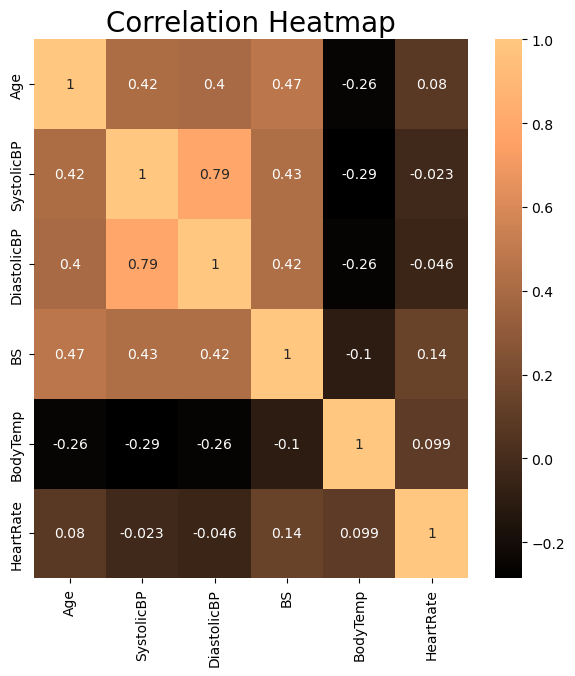

In [36]:
corr=dset.corr(numeric_only=True)

plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, cmap="copper")
plt.title('Correlation Heatmap', fontsize=20)

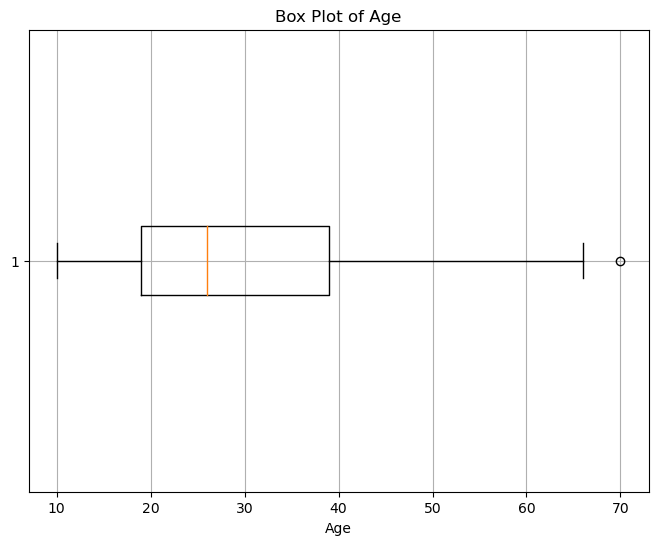

In [8]:
plt.figure(figsize=(8, 6))
plt.boxplot(dset['Age'], vert=False)
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.grid(True)
plt.show()

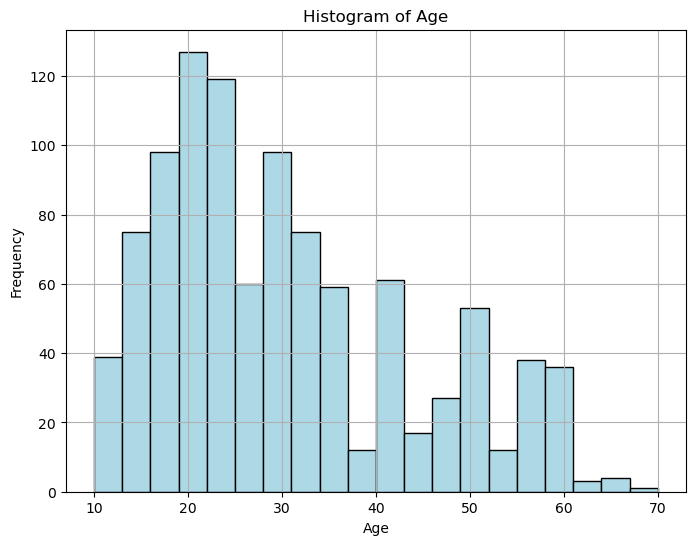

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(dset['Age'], bins=20, color='lightblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

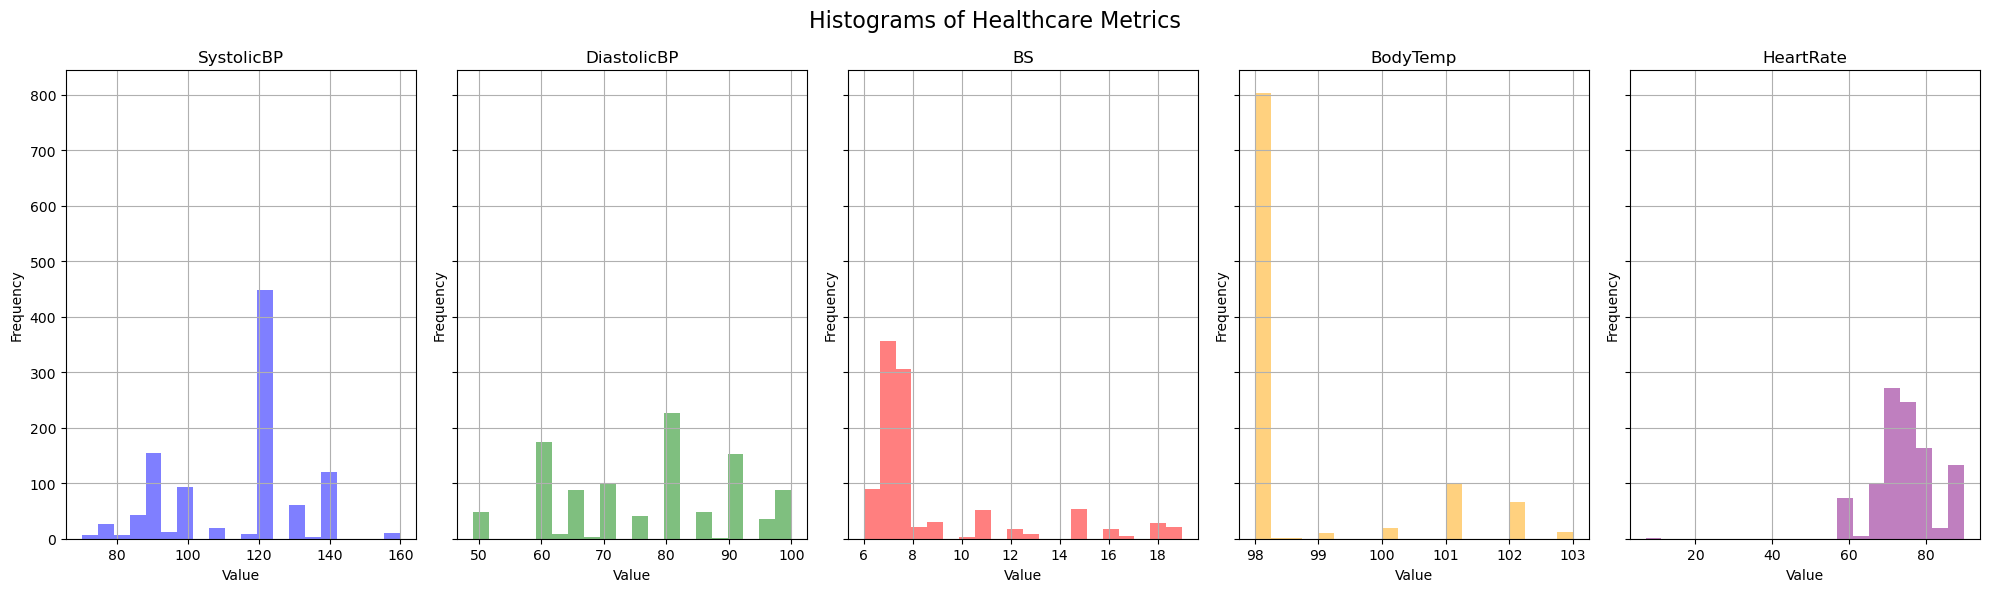

In [14]:
fig, axs = plt.subplots(1, 5, figsize=(20, 6), sharey=True)

axs[0].hist(dset['SystolicBP'], bins=20, color='blue', alpha=0.5)
axs[0].set_title('SystolicBP')
axs[1].hist(dset['DiastolicBP'], bins=20, color='green', alpha=0.5)
axs[1].set_title('DiastolicBP')
axs[2].hist(dset['BS'], bins=20, color='red', alpha=0.5)
axs[2].set_title('BS')
axs[3].hist(dset['BodyTemp'], bins=20, color='orange', alpha=0.5)
axs[3].set_title('BodyTemp')
axs[4].hist(dset['HeartRate'], bins=20, color='purple', alpha=0.5)
axs[4].set_title('HeartRate')

for ax in axs:
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.grid(True)

plt.suptitle('Histograms of Healthcare Metrics', fontsize=16)
plt.tight_layout()
plt.show()

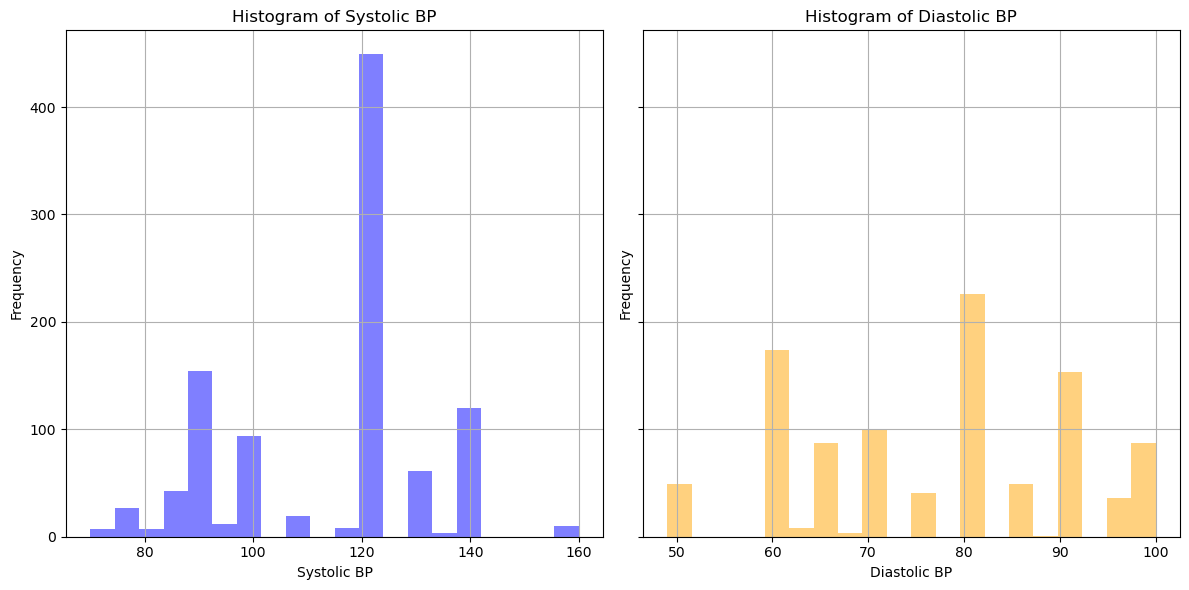

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

axs[0].hist(dset['SystolicBP'], bins=20, color='blue', alpha=0.5)
axs[0].set_title('Histogram of Systolic BP')
axs[0].set_xlabel('Systolic BP')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

axs[1].hist(dset['DiastolicBP'], bins=20, color='orange', alpha=0.5)
axs[1].set_title('Histogram of Diastolic BP')
axs[1].set_xlabel('Diastolic BP')
axs[1].set_ylabel('Frequency')
axs[1].grid(True)

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

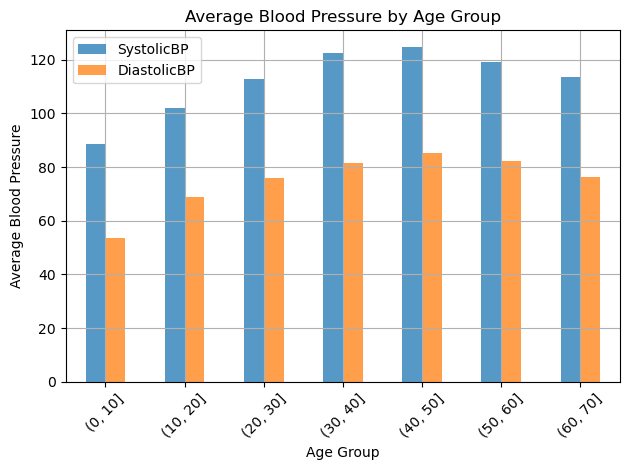

In [24]:
age_bins = np.arange(0, dset['Age'].max() + 10, 10)

age_grouped = dset.groupby(pd.cut(dset['Age'], age_bins))
blood_pressure_means = age_grouped[['SystolicBP', 'DiastolicBP']].mean()

plt.figure(figsize=(10, 6))
blood_pressure_means.plot(kind='bar', alpha=0.75)

plt.title('Average Blood Pressure by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Blood Pressure')
plt.xticks(rotation=45) 

plt.grid(True)
plt.tight_layout()
plt.show()